In [4]:
#program drukujący nazwę sekwencji o największej procentowej zawartości par GC, oraz tą liczbę
from Bio import SeqIO
max_sequence_id = None
max_gc_content = 0

for seq_record in SeqIO.parse("GCA_000006565.2_TGA4_genomic.fna", "fasta"):
    sequence = str(seq_record.seq) #tworzymy stringa dla kompatybilności z podstawowymi pakietami Pythona
    sequence_id = seq_record.id
    gc_content = (sequence.count("C") + sequence.count("G")) / len(sequence) * 100
    if gc_content > max_gc_content:
        max_gc_content = gc_content
        max_sequence_id = sequence_id

print(round(max_gc_content, 2), "%, ", max_sequence_id)



67.22 %,  KE140774.1


In [8]:
from Bio import SeqIO
sequences_list = []
for sequence in SeqIO.parse("GCA_000006565.2_TGA4_genomic.fna", "fasta"):
    sequences_list.append(sequence) #stworzyliśmy listę, która zawiera sekwencje z naszego genomu

print(sequences_list[100])

sequences_list[-1].count("A") #zliczamy ile razy w sekwencji ostatniej pojawiła się adenozyna

from Bio.SeqUtils import GC
GC(sequences_list[0]) #funkcja obliczająca zawartość procentową par zasad GC
print("A teraz łatwiejsza metoda obliczenia procentowej zawartości par GC w sekwencji: ", round(GC(sequences_list[100]), 2))


ID: KE138930.1
Name: KE138930.1
Description: KE138930.1 Toxoplasma gondii ME49 unplaced genomic scaffold asmbl.148, whole genome shotgun sequence
Number of features: 0
Seq('ggtcgatagaataaggtagataagggaagtcggcaaaatagatccgtaacttcg...CCG')
A teraz łatwiejsza metoda obliczenia procentowej zawartości par GC w sekwencji:  48.46


In [10]:
from Bio import SeqIO
example_sequence = sequences_list[172]
print(example_sequence)
print("\n")
print(example_sequence.reverse_complement())
print("\n")
print(example_sequence.translate())
print("\n")
#print(example_sequence.transcribe)
print("\n")
#print(example_sequence.back_transcribe())

print(example_sequence.id, "\n", example_sequence.description, "\n", example_sequence.seq)

print("ciekawe co to", example_sequence.letter_annotations)

#nie wolno zapisywać KAŻÐEJ sekwencji do memory bo przeciążymy memory

ID: KE139002.1
Name: KE139002.1
Description: KE139002.1 Toxoplasma gondii ME49 unplaced genomic scaffold asmbl.303, whole genome shotgun sequence
Number of features: 0
Seq('TGTCACCGGTACACAAATGCGGAGTAGAAATGCCGACACCCGGAAAACGCGCgg...att')


ID: <unknown id>
Name: <unknown name>
Description: <unknown description>
Number of features: 0
Seq('aatgtctgttatatcgtgcactgatcagtcatctggcgcacgatattacttctg...ACA')


ID: <unknown id>
Name: <unknown name>
Description: <unknown description>
Number of features: 0
/molecule_type=protein
Seq('CHRYTNAE*KCRHPENAREQMRSVTPRCAGPLNTTRFCGGGDAFGKLV*Y*NVY...TDI')




KE139002.1 
 KE139002.1 Toxoplasma gondii ME49 unplaced genomic scaffold asmbl.303, whole genome shotgun sequence 
 TGTCACCGGTACACAAATGCGGAGTAGAAATGCCGACACCCGGAAAACGCGCgggagcaaatgcggagtgtgACGCCACGCTGTGCAGGCCCCTTGAACACAACTCGCTTTTGCGGGGGCGGCGACGCGTTTGGGAAACTCGTATAATATTAAAACGTGTattctgaagaaagcctcgcagaaaagaagcttttactaccgccttgggcggggagacgcagccatGTTGTTTTACAACAGTCATGGTGGGTCGTACACGTCCCCAGCAACATGTGAGGAATGTGACGCCAA

In [6]:
from collections import defaultdict 
from Bio import SeqIO


recs = SeqIO.parse("GCA_000006565.2_TGA4_genomic.fna", "fasta")

count = defaultdict(int) #tworzymy obiekt z pakietu collection typu deafultdict. Będzie on przechowywał zliczenia poszczególnych nukleotydów
for rec in recs:
    recs = str(recs).upper()
    for letter in rec.seq:
        count[letter] += 1
tot = sum(count.values())
for letter, count in count.items(): #.items() to funkcja służąca do łatwiejszego przypisania elementów par klucz-hasło w słowniku
    print('%s: %.2f %d' % (letter, 100. * count / tot, count))
# %s oznacza by wydrukować letter jako string, %.2f oznaczy by wydrukować liczbę uzyskaną z działania 100*count/tot jako liczba typu float z dwoma miejscami po przecinkku. %d oznacza by wydrukować liczbę count jako liczbę całkowitą



T: 19.60 12868631
G: 22.19 14574729
A: 19.58 12859748
C: 22.21 14587625
t: 4.19 2749149
c: 3.86 2533512
g: 3.86 2533826
a: 4.20 2757001
N: 0.31 205473


In [1]:
from collections import defaultdict 
from Bio import SeqIO

recs = SeqIO.parse("GCA_000006565.2_TGA4_genomic.fna", "fasta")
n_count = defaultdict(int)
for rec in recs:
    for i, letter in enumerate(rec.seq):
        pos = i + 1
        if letter == "N":
            n_count[pos]+= 1

seq_length = max(n_count.keys())
positions = range(1, seq_length +1)
fig, ax = plt.subplots(fiqsize = (16,9))
ax.plot(positions, [n_count[x] for x in positions])
ax.set_xlim(1, seq_length)
pass
            

NameError: name 'plt' is not defined

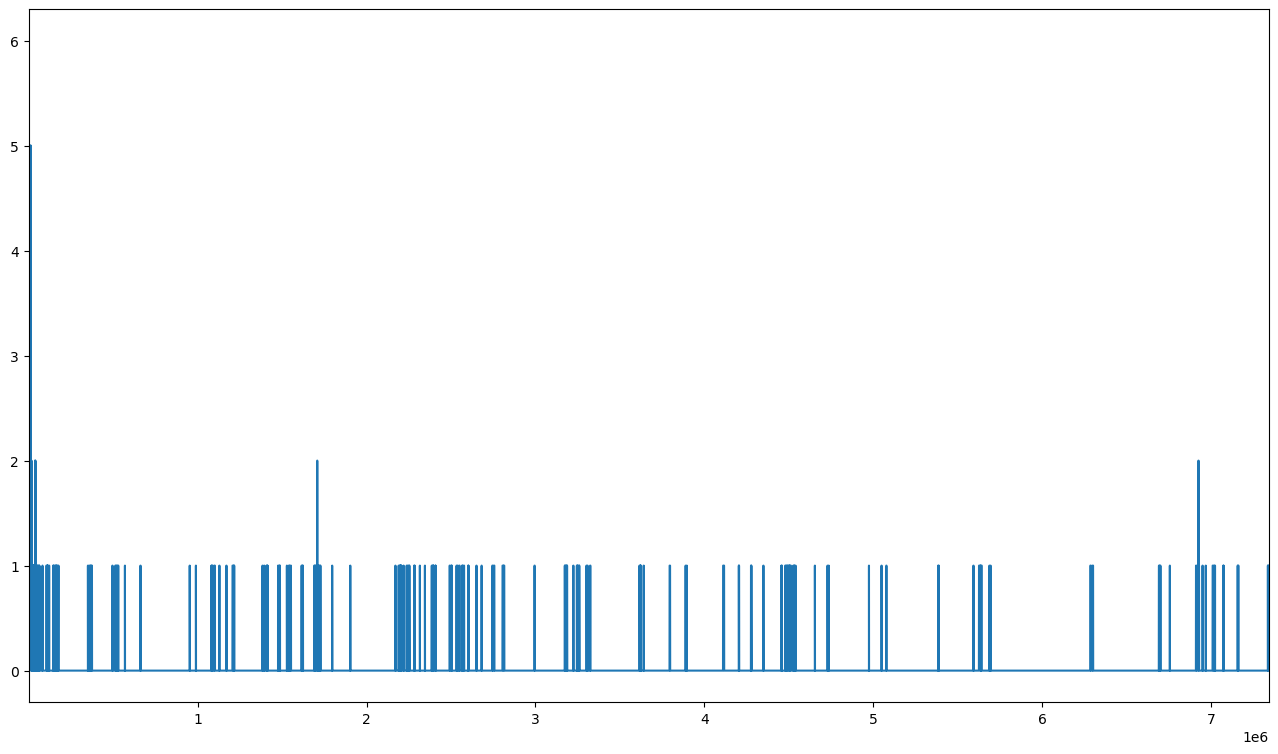

In [3]:
from collections import defaultdict
from Bio import SeqIO
import matplotlib.pyplot as plt

recs = SeqIO.parse("GCA_000006565.2_TGA4_genomic.fna", "fasta")
n_count = defaultdict(int)

for rec in recs:
    for i, letter in enumerate(rec.seq):
        pos = i + 1
        if letter == "N":
            n_count[pos] += 1

seq_length = max(n_count.keys())
positions = range(1, seq_length + 1)

fig, ax = plt.subplots(figsize=(16, 9))  # Poprawa błędu w rozmiarze figury
ax.plot(positions, [n_count[x] for x in positions])
ax.set_xlim(1, seq_length)

plt.show()  # Dodanie polecenia show() dla poprawnego wyświetlenia wykresu


In [ ]:
#coś o nie dokońca 
jasnym dla mnie zagadnieniu: 
from Bio import SeqIO
from collections import defaultdict
recs = SeqIO.parse("GCA_000006565.2_TGA4_genomic.fna", "fasta")
count_qual = defaultdict(int) #inicjuje utworzenie zmiennej słownikowej defaultdict do której będziemy potem dodawali inne zmienne
for rec in recs: #iterujemy po każdej sekwencji, odczycie
    for i, qual in enumerate(rec.letter_annotations["phred_quality"]): #iterujemy po każdym nukleotydzie oraz enumerate numeruje po indeksie (i)
        if i <25: #dodatkowo .letter_annotations["phred_quality"] to funkcja odnosząca się do jakości nukleotydów w sekwencji
            continue
        count_qual[qual] += 1
tot = sum(count_qual.values())
for qual, count in count_qual.items():
    print("%d:, %.2f, %d" % (qual, 100. * count / tot, count))


In [17]:
#Pairwise alingment
from Bio import pairwise2
#global - match score = 1, mismatches - and no gap penalty/ Pierwszy x w nazwie funkcji niżej znaczy o matchach a drugi o gap penalty
print("Słowem wstępu, match parameters (pierszy x) to:", "\n", "x - parametry domyślne  - match = 1, mismatch or gap = 0 ", "\n", "m - score wynik identycznych znaków - identycznosć match i mismatch?", "\n", "d - tworzy słownik zwracający wynik każdego znaku." , "\n", "c - drugie wywołanie funkcji i wywołanie wyników???")
print("\n", "\n", "Parametry do gap penalty (drugi x):", "\n", "x - brak kar - wartość 0" , "\n", "s - takie same kary za otwarcie i rozszerzenie gapu dla obu sekwencji", "\n", "d - sekwencje mają różnej wartości kary za otwarcie i rozszerzenie gapu" , "\n", "c działa podobnie czyli nie wiem jak")
print("\n", "\n", "Parametry: match score = 1, mismatches =0 and gap penalty = 0""\n")
alignments = pairwise2.align.globalxx("ACCGGT", "ACGT") # porównuje globalnie obie sekwencje na każdą możliwą opcję. Zamiast xx można wstawić inne parametry takie jak s d
print(alignments)

for alignment in alignments:
    print(pairwise2.format_alignment(*alignment)) #formatuje uzyskane wcześniej alingmenty i przedstawia je w przystępnej formie


#globalmx - match score = 1, mismatches - and no gap penalty
print("\n", "\n", "parametry teraz takie: match score = 1, mismatches =-1 and gap penalty = 0", "\n")
alignments = pairwise2.align.globalmx("ACCGGT", "ACGT", match = 2, mismatch = -1) # porównuje globalnie obie sekwencje na każdą możliwą opcję. 
for alignment in alignments:
    print(pairwise2.format_alignment(*alignment)) #formatuje uzyskane wcześniej alingmenty i przedstawia je w przystępnej formie


#globalxs - match score = 1, mismatches = 0, opening gap = -2, extended gap = -1
print("\n", "\n", "parametry teraz takie: match score = 1, mismatches =0 and gap penalty = -1", "\n")
alignments = pairwise2.align.globalxs("ACCGGT", "ACGT", open = -2, extend = -1)
for alignment in alignments:
    print(pairwise2.format_alignment(*alignment))

Słowem wstępu, match parameters (pierszy x) to: 
 x - parametry domyślne  - match = 1, mismatch or gap = 0  
 m - score wynik identycznych znaków - identycznosć match i mismatch? 
 d - tworzy słownik zwracający wynik każdego znaku. 
 c - drugie wywołanie funkcji i wywołanie wyników???

 
 Parametry do gap penalty (drugi x): 
 x - brak kar - wartość 0 
 s - takie same kary za otwarcie i rozszerzenie gapu dla obu sekwencji 
 d - sekwencje mają różnej wartości kary za otwarcie i rozszerzenie gapu 
 c działa podobnie czyli nie wiem jak

 
 Parametry: match score = 1, mismatches =0 and gap penalty = 0

[Alignment(seqA='ACCGGT', seqB='A-C-GT', score=4.0, start=0, end=6), Alignment(seqA='ACCGGT', seqB='AC--GT', score=4.0, start=0, end=6), Alignment(seqA='ACCGGT', seqB='A-CG-T', score=4.0, start=0, end=6), Alignment(seqA='ACCGGT', seqB='AC-G-T', score=4.0, start=0, end=6)]
ACCGGT
| | ||
A-C-GT
  Score=4

ACCGGT
||  ||
AC--GT
  Score=4

ACCGGT
| || |
A-CG-T
  Score=4

ACCGGT
|| | |
AC-G-T
  Sco

In [ ]:
#alingmenty ale na podstawie określonej macierzy blosum62
from Bio.Align import substitution_matrices
from Bio import pairwise2
matrix = substitution_matrices.load("BLOSUM62")
alignments = pairwise2.align.globaldx("KEVLA", "EVL", match_dict = matrix) #fragment match_dict = matrix to zbiór w formacie słownika, który został pobrany z pakietu blosum62 (ręcznie) i daje informacji programowi do alingmentów, jak powinien się zachować 
print("Parametry takie: przyrównanie globalne według macierzy blosum62. d - znaczy że musimy podać do argumentu słownik jakim program będzie się kierował - czyli to wyznacza nam że jesteśmy w blosum62. Parametr x mówi o braku kar za rozpoczęcie i kontynuowaniu przerwy.")
for alignment in alignments: #dx: X: czyli nie dajemy żadnej kary za przerwy i rozszerzanie przerw (jak wyżej) ale d: ustalamy słownik
    print(pairwise2.format_alignment(*alignment))

print("\n","\n", "Gdybyśmy zabrali parametr match_dict to by się wykrzaczyło", "\n", "\n", "Dlatego zabierzmy jednocześnie match_dict oraz 'd', zostanie to:")
#matrix = ... niepotrzebne!
alignments = pairwise2.align.globalxx("KEVLA", "EVL")
for alignment in alignments:
    print(pairwise2.format_alignment(*alignment))  #ta gwiazdka ***** *** oznacza element rozpakowania krotki lub listy w Pythonie
    print("czyli macierz o standardowej punktacji, nie blosum)")


In [ ]:
from Bio import pairwise2
from math import log

print("Robimy ciekawą funckję - samemu będziemy określać karę za przerwy")

def gap_function(x, y): #x to pozycja w sekwencji.(musi tam być choć nie jest określona) Y to długość przerwy
    if y == 0:
        return 0
    elif y == 1:
        return -2
    return -(2+y/4.0 + log(y)/2.0)

alignments = pairwise2.align.globalmc("ACCCCGT", "ACG", match = 5, mismatch = -4, 
                                     gap_A_fn = gap_function, gap_B_fn = gap_function)
for alignment in alignments:
    print(pairwise2.format_alignment(*alignment))
print("Napisaliśmy funckcję która brak gapu punktuje jako neutralne ale otwarcie go już jako -2. Każda kolejna pozycja jest określona wzorem")


In [ ]:
#pobawmy się teraz blastem
from Bio.Blast import NCBIWWW
sequence = """gtgaacgctggcggcaggcctaacacatgcaagtcgaacggcagcacagtggtagcaataccatgggtggcgagtggcggacgggtgaggaatacatcggaatctaccttttcgtgggggataacgtagggaaac"""
result_handle = NCBIWWW.qblast("blastn", "nt", sequence) #"program, np. blastp, blastn", "baza jaką przeszukujemy", "sekwencja"

from Bio.Blast import NCBIXML
blast_records = NCBIXML.parse(result_handle)
blast_records = list(blast_records)
blast_records
#chyba nie działa a w każdym razie nie odpowiada

Obiekty typu handle służą do przechowywanie informacji czerpanych z serwisów online. By zwolnić zasoby, należy zamknąć ten obiekt komendą handle.close()
Waga całego DNA to: 9241219.214400413
procentowa zawartość par GC to 37.97


Text(0.5, 1.0, 'Nucleotide frequency')

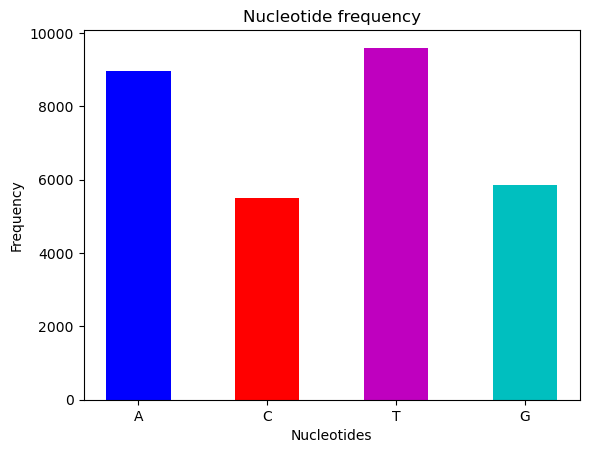

In [59]:
#zabawa z covidem
#kod pobiera dane z bazy NCBI - komunikuje się z bazą pakiet Entrez
from Bio import Entrez, SeqIO
Entrez.email = "tliofebr@gmail.com"
handle = Entrez.efetch(db = "nucleotide", id = "MN908947", rettype = "gb", retmode = "text") # w obiekcie typu handle przechowujemy informacje pobrnae przez efetch. Database to nucleotide, potem ID ,rettype czyli format (genebank), retmote = text. 
recs = list(SeqIO.parse(handle, "gb"))
handle.close()

print("Obiekty typu handle służą do przechowywanie informacji czerpanych z serwisów online. By zwolnić zasoby, należy zamknąć ten obiekt komendą handle.close()")

recs
covid_dna = recs[0].seq
covid_dna

from Bio.SeqUtils import molecular_weight
print(f"Waga całego DNA to: {molecular_weight(covid_dna)}")

from Bio.SeqUtils import GC
print(f"procentowa zawartość par GC to {round(GC(covid_dna),2 )}")


#a teraz wykres machniemy
count_nucleotides = {
    'A': covid_dna.count('A'),
    'C': covid_dna.count('C'),
    'T': covid_dna.count('T'),
    'G': covid_dna.count('G'),
}

import matplotlib.pyplot as plt
width = 0.5
plt.bar(count_nucleotides.keys(), count_nucleotides.values(), width, color = ['b', 'r', 'm', 'c'])
plt.xlabel("Nucleotides")
plt.ylabel("Frequency")
plt.title("Nucleotide frequency")

Covid19 has 9193 amino acids
Covid19 has 775 proteins
CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCG

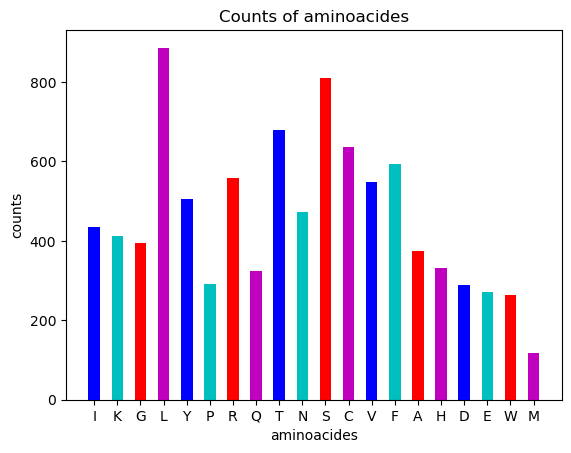

In [81]:
#machnijmy transkrypcje i translacje
covid_mrna = covid_dna.transcribe()
covid_mrna

covid_aa = covid_mrna.translate()
covid_aa

#wypunktujmy 10 najczęstszych aminokwasów
from collections import Counter
common_amino = Counter(covid_aa)
common_amino.most_common(10) #wbudowane print()

#usuńmy gwiazdkę
del common_amino['*']
common_amino.most_common(10) #nice

#teraz plot
width = 0.5
import matplotlib.pyplot as plt

plt.bar(common_amino.keys(), common_amino.values(), width, color = {'b', 'r', 'm', 'c'})
plt.xlabel("aminoacides")
plt.ylabel("counts")
plt.title("Counts of aminoacides")


print(f"Covid19 has {sum(common_amino.values())} amino acids")
proteins = covid_aa.split('*') #rozdziela sekwencje separatorem gwiazdkowym, ponieważ jako gwiazdkę oznaczamy kodon stop
proteins[:5] #pokazuje pięć pierwszych aminokwasów
print(f"Covid19 has {len(proteins)} proteins") 

for protein in proteins:
    if len(protein)<20:
        proteins.remove(protein)

top_5_proteins = sorted(proteins, key = len)
print(top_5_proteins[-1])


#zapiszmy to najkrótsze białko
with open("protein_seq.fasta", "w") as file:
    file.write(f">covid protein \n{top_5_proteins[-1]}") #zapisałem ! działa

In [ ]:
#łączymy to co wyżej z NCBIWWW
from Bio import SeqIO
protein_seq = SeqIO.read("protein_seq.fasta", "fasta") #wczytujemy nasz plik z poprzedniego pola

from Bio.Blast import NCBIWWW
result_handle = NCBIWWW.qblast("blastp", "pdb", protein_seq.seq) #pdb - protein data bank. Tworzymy plik typu handle z programu blastp z bazy pdb na podstawie naszego pliku

from Bio import SearchIO
blast_records = SearchIO.read(result_handle, 'blast-xml')
print(blast_records[0:10]) #coś oczywiście nie działa z NCBIWWW

In [4]:
# Teraz wizualizacja! Korzystamy z bazy Protein Data Bank PDB - zawiera wszystko o białkach, o ich każdym atomie
seq_id = "pdb|6YYT|A"
id = seq_id.split("|")[1] #wyodrębniamy ID sekwencji
id

#pobierzmy dane z serwera
!wget https://files.rcsb.org/download/6YYT.pdb #to faktycznie działa
#musimy przenieść się do innego okienka żeby nie pobierało pliku ponownie



--2023-12-09 09:18:15--  https://files.rcsb.org/download/6YYT.pdb
Translacja files.rcsb.org (files.rcsb.org)... 128.6.159.245
Łączenie się z files.rcsb.org (files.rcsb.org)|128.6.159.245|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: nieznana [application/octet-stream]
Zapis do: ‘6YYT.pdb.1’

6YYT.pdb.1              [    <=>             ] 954,91K  1,12MB/s    w 0,8s     

2023-12-09 09:18:19 (1,12 MB/s) - zapisano ‘6YYT.pdb.1’ [977832]



/home/norbert/miniconda3/lib/python3.11/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12059.
  warnings.warn(


<Structure id=6YYT>

In [ ]:
from Bio.PDB import PDBParser #Bio.PDB zajmuje się strukturami białek. PDBParser wyodrębnia lub też analizuje dane z tych plików i przekształca je w plik structure
parser = PDBParser()
structure = parser.get_structure("6YYT", "6YYT.pdb")
structure

In [5]:
for chain in structure[0]:
    print(f"Chain ID: {chain.id}") #to białko covida ma 8 różnych łańcuchów

Chain ID: A
Chain ID: B
Chain ID: C
Chain ID: D
Chain ID: P
Chain ID: Q
Chain ID: T
Chain ID: U


In [10]:
import nglview as nv #pakiet ten umożliwia oglądanie struktur w 3d, ale coś nie działa
nv.show_biopython(structure, gui = True) #gui oznacza włączenie interfejsu użytkownika ale też coś nie działa

NGLWidget()

In [41]:
#Tworzenie motywów 
from Bio import motifs
from Bio.Seq import Seq
instances = [
    Seq("TACAA"), 
    Seq("TACGC"), 
    Seq("TACCC"), 
    Seq("TACAC"), 
    Seq("AACCC"), 
    Seq("AATGC"), 
    Seq("AATGC")     
]

m = motifs.create(instances) #tworzymy obiekt klasy motifs
print(m)

print(f"powstaje nam tabelka którą trzeba interpretować tak: Adenozyna na drugiej (1. bo liczymy od zera) pozycji występuje w siedmiu sekwencjach{m.counts}") #
print(f"\n wyświetla to co wyżej ale w okrojonej formie i skupia się na adenozynie:\t{m.counts['A']}") #
print(f"\n wyświetla jakie nukleotydy i w jakich ilościach występują na pozycji czwartej \t{m.counts[:, 3]}") #wyświetla jakie nukleotydy i w jakich ilościach występują na pozycji czwartej
print(f"\n wyswietla na jakiej pozycji i w jakiej ilosci wystepuje tymina (bo A ma indeks 0) \t{m.counts[3, :]}")

print(f"pozycja najczęśćiej występująca - konsensusowa \t {m.consensus}")
print(f"pozycja najrzadziej występująca - antykonsensusowa \t {m.anticonsensus}")
print(f"W przypadku gdy jakaś zasada występuje na danej pozycji tyle samo razy co inna zasada, musimy wprowadzić szersze pojęcie. Jako W zapisujemy A lub T oraz jako B A, C i G \t {m.degenerate_consensus} \t --- przydałby się manual - rozdział 14")

TACAA
TACGC
TACCC
TACAC
AACCC
AATGC
AATGC

powstaje nam tabelka którą trzeba interpretować tak: Adenozyna na drugiej (1. bo liczymy od zera) pozycji występuje w siedmiu sekwencjach        0      1      2      3      4
A:   3.00   7.00   0.00   2.00   1.00
C:   0.00   0.00   5.00   2.00   6.00
G:   0.00   0.00   0.00   3.00   0.00
T:   4.00   0.00   2.00   0.00   0.00


 wyświetla to co wyżej ale w okrojonej formie i skupia się na adenozynie:	[3, 7, 0, 2, 1]

 wyświetla jakie nukleotydy i w jakich ilościach występują na pozycji czwartej 	{'A': 2, 'C': 2, 'G': 3, 'T': 0}

 wyswietla na jakiej pozycji i w jakiej ilosci wystepuje tymina (bo A ma indeks 0) 	(4, 0, 2, 0, 0)
pozycja najczęśćiej występująca - konsensusowa 	 TACGC
pozycja najrzadziej występująca - antykonsensusowa 	 CCATG
W przypadku gdy jakaś zasada występuje na danej pozycji tyle samo razy co inna zasada, musimy wprowadzić szersze pojęcie. Jako W zapisujemy A lub T oraz jako B A, C i G 	 WACVC


In [49]:
#Plotting sequence length and GC content

#pobieramy dane
!wget https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta

from Bio import SeqIO
sequences = []
for seq_record in SeqIO.parse("ls_orchid.fasta", "fasta"):
    sequences.append(seq_record.seq) #append dobudowuje nam jedną sekwencję do drugiej tak by powstał nam cały genom? nie wiem, dluższy ciąg sekwencji

--2023-12-09 10:01:11--  https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta
Translacja raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Łączenie się z raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: 76480 (75K) [text/plain]
Zapis do: ‘ls_orchid.fasta’

ls_orchid.fasta     100%[===================>]  74,69K  --.-KB/s    w 0,04s    

2023-12-09 10:01:11 (1,87 MB/s) - zapisano ‘ls_orchid.fasta’ [76480/76480]



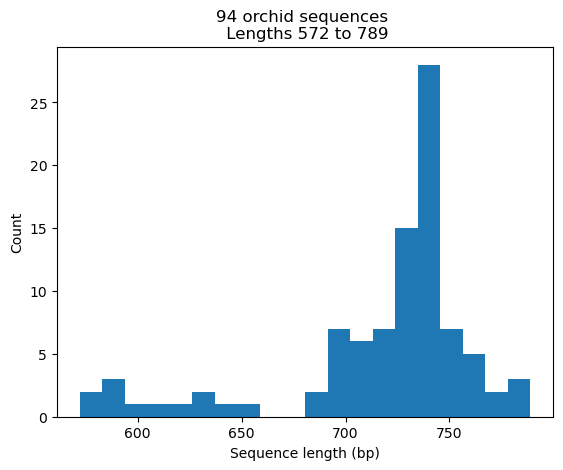

In [59]:
#histogram długości sekwencji
#najpierw zróbmy pętle liczącą długość każdej sekwencji
sizes = [len(rec) for rec in sequences]
import matplotlib.pyplot as plt
plt.hist(sizes, bins = 20) #sizes czyli ox x, bins na ile słupków zostanie podzielony ten wykres #szczegółowość. Na Y mamy liczebność tych sekwencji w danym zakresie
plt.title(f"{len(sizes)} orchid sequences \n Lengths {min(sizes)} to {max(sizes)}")
plt.xlabel("Sequence length (bp)")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'GC%')

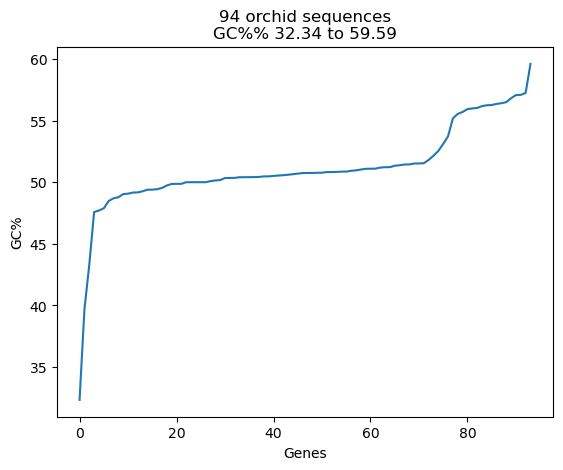

In [68]:
#wykres zawartośći par GC
from Bio.SeqUtils import GC
gc_values = sorted(GC(rec) for rec in sequences) #nie dość że dla każdego rekordu oblicza zawartość par GC to jeszcze to sortuje

plt.plot(gc_values)
plt.title(f"{len(gc_values)} orchid sequences\nGC%% {round(min(gc_values), 2)} to {round(max(gc_values), 2)}")
plt.xlabel("Genes")
plt.ylabel("GC%")


In [69]:

#Zabawa z dużymi pplikami - ten to 1GB!


!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR494/SRR494102/SRR494102.fastq.gz



--2023-12-09 10:21:53--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR494/SRR494102/SRR494102.fastq.gz
           => ‘SRR494102.fastq.gz’
Translacja ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Łączenie się z ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.165|:21... połączono.
Logowanie się jako anonymous ... Zalogowano się!
==> SYST ... zrobiono.    ==> PWD ... zrobiono.
==> TYPE I ... zrobiono.  ==> CWD (1) /vol1/fastq/SRR494/SRR494102 ... zrobiono.
==> SIZE SRR494102.fastq.gz ... 606078059
==> PASV ... zrobiono.    ==> RETR SRR494102.fastq.gz ... zrobiono.
Długość: 606078059 (578M) (nie autorytatywne)

SRR494102.fastq.gz  100%[===================>] 578,00M  68,2MB/s    w 9,0s     

2023-12-09 10:22:03 (64,2 MB/s) - zapisano ‘SRR494102.fastq.gz’ [606078059]



In [70]:
#musimy go otworzyć, wypakować
!gzip -d SRR494102.fastq.gz

In [72]:
from Bio import SeqIO
fq_dict = SeqIO.index("SRR494102.fastq", "fastq") #index pozwala nam zaglądać do wielkich plików po ich nazwach, wtedy gdy nie chcemy iterować z powodu za dużych rozmiarów


In [77]:
#sprawdźmy długość tego słownika
len(fq_dict)
list(fq_dict.keys())[:5]

fq_dict["SRR494102.20000"].seq #właśnie pobraliśmy 20 000 sekwencję z kolei


Seq('AGCAACCACCATGACCACCCCTTCACCAACCACCAC')

In [81]:
#zabawa z mniejszymi plikami fasta
records = list(SeqIO.parse("ls_orchid.fasta", "fasta"))
for record in records:
    print(len(record))
    #możęmy tak zrobić bo ten plik jest niewielki
    

740
753
748
744
733
718
730
704
740
709
700
726
753
699
658
752
726
765
755
742
762
745
750
731
741
740
727
711
743
727
757
770
767
759
750
788
774
789
688
719
743
737
728
740
696
732
731
735
720
740
629
572
587
700
636
716
592
716
733
626
737
740
574
594
610
730
641
702
733
738
736
732
745
744
738
739
740
745
695
745
743
730
706
744
742
694
712
715
688
784
721
703
744
592


In [83]:
#posortujemy je
records.sort(key = lambda r: (len(r))) #sortowanie rosnąćo. malejąco jest tak: -len(r)
#lambda to anonimowa funkcja dziąłająca tylko chwilowo. Przyjmuje argument r i podaje go dalej. Funkcja Key potrzebuje jakiegoś wejścia, innej funkcji

In [88]:
#sortujemy tak duże pliki:
len_and_ids = sorted(
    (len(rec), rec.id) for rec in SeqIO.parse("ls_orchid.fasta", "fasta")
) #dla każdego rec w SeqIO.... wypisz dlugosc i id
len_and_ids




[(572, 'gi|2765606|emb|Z78481.1|PIZ78481'),
 (574, 'gi|2765595|emb|Z78470.1|PPZ78470'),
 (587, 'gi|2765605|emb|Z78480.1|PGZ78480'),
 (592, 'gi|2765564|emb|Z78439.1|PBZ78439'),
 (592, 'gi|2765601|emb|Z78476.1|PGZ78476'),
 (594, 'gi|2765594|emb|Z78469.1|PHZ78469'),
 (610, 'gi|2765593|emb|Z78468.1|PAZ78468'),
 (626, 'gi|2765598|emb|Z78473.1|PSZ78473'),
 (629, 'gi|2765607|emb|Z78482.1|PEZ78482'),
 (636, 'gi|2765603|emb|Z78478.1|PVZ78478'),
 (641, 'gi|2765591|emb|Z78466.1|PPZ78466'),
 (658, 'gi|2765643|emb|Z78518.1|CRZ78518'),
 (688, 'gi|2765569|emb|Z78444.1|PAZ78444'),
 (688, 'gi|2765619|emb|Z78494.1|PNZ78494'),
 (694, 'gi|2765572|emb|Z78447.1|PVZ78447'),
 (695, 'gi|2765579|emb|Z78454.1|PFZ78454'),
 (696, 'gi|2765613|emb|Z78488.1|PTZ78488'),
 (699, 'gi|2765644|emb|Z78519.1|CPZ78519'),
 (700, 'gi|2765604|emb|Z78479.1|PPZ78479'),
 (700, 'gi|2765647|emb|Z78522.1|CMZ78522'),
 (702, 'gi|2765590|emb|Z78465.1|PRZ78465'),
 (703, 'gi|2765566|emb|Z78441.1|PSZ78441'),
 (704, 'gi|2765650|emb|Z78525.1|

In [89]:
ids = reversed([id for (length, id) in len_and_ids]) # reverse for descending order (from longest seq to smallest)
ids
del len_and_ids # zwolnimy z pamięci żeby nie zaśmiecać

In [91]:
record_index = SeqIO.index("ls_orchid.fasta", "fasta") #indeksuhemy do sprawniejszego poruszania się


# grab sequence from indexed dict by sorted id
records = (record_index[id] for id in ids) 
SeqIO.write(records, "sorted.fasta", "fasta")



94